In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
def cut(array,row,column):
    array=array[:row]
    for i in range(len(array)):
        array[i]=array[i][:column]
    return array

In [3]:
#initial setup of all 2d arrays
pmax=-6
dp=-0.005
p=np.arange(0,pmax,dp)
v=np.zeros(len(p))
dv=dp
halfing=0

Rl=np.zeros(len(v)*len(p)).reshape(len(v),len(p))
Rn=np.zeros(len(v)*len(p)).reshape(len(v),len(p))
Rnp=np.zeros(len(v)*len(p)).reshape(len(v),len(p))
C=np.zeros(len(v)*len(p)).reshape(len(v),len(p))
R=np.zeros(len(v)*len(p)).reshape(len(v),len(p))
K=np.zeros(len(v)*len(p)).reshape(len(v),len(p))
Kp=np.zeros(len(v)*len(p)).reshape(len(v),len(p))
Φnv=np.zeros(len(v)*len(p)).reshape(len(v),len(p))
Φnp=np.zeros(len(v)*len(p)).reshape(len(v),len(p))
Φn=np.zeros(len(v)*len(p)).reshape(len(v),len(p))
Φl=np.zeros(len(v)*len(p)).reshape(len(v),len(p))
Φlp=np.zeros(len(v)*len(p)).reshape(len(v),len(p))
#ΦlH=0

#pulH=np.linspace(-10,0,len(v)-1)
#pulN=np.linspace(-10,0,len(p)-1)


In [4]:
#data at intersection :
R0=1
Φn[0][0]=0 
Φnp[0][0]=0 
Rl[0][0]=0  
Rn[0][0]=-1 
Φl[0][0] = 0
C[0][0] = 2*Φl[0][0]**2
R[0][0]=R0
K[0][0]=1/(2*R[0][0])*(1-2*C[0][0]*Φn[0][0]**2)
Φnv[0][0]=  (-Φn[0][0]/(2*R[0][0])*(1-4*Φl[0][0]**2*Φn[0][0]**2) - 2*Φl[0][0]**2 * Φnp[0][0] + Φl[0][0]/R[0][0] ) #96

Rnp[0][0]=-(Φn[0][0]**2/R[0][0])
Φlp[0][0] = -(Rl[0][0]*Φn[0][0]/R[0][0])
Kp[0][0]  = (1/R[0][0]**2) * (1+2*Rl[0][0]*Rn[0][0]-2*Φl[0][0]*Φn[0][0])
#data on Nbar:
for k in range(len(p)-1):
    #calculate Derivatives    
    Rnp[0][k] =-(Φn[0][k]**2/R[0][k])
    Φlp[0][k] = -(Rl[0][k]*Φn[0][k]/R[0][k])
    Kp[0][k] = (1/R[0][k]**2) * (1+2*Rl[0][k]*Rn[0][k]-2*Φl[0][k]*Φn[0][k])
    
    #midpoint
    if k>=1: 
        Rn[0][k+1] =  Rnp[0][k]*2*dp + Rn[0][k-1]
        R[0][k+1]  =   Rn[0][k]*2*dp + R[0][k-1] 
        Φl[0][k+1] =  Φlp[0][k]*2*dp + Φl[0][k-1]    
        K[0][k+1]  =   Kp[0][k]*2*dp + K[0][k-1]
        
    else: #Euler 
        Rn[0][k+1]  = Rnp[0][k]*dp +Rn[0][k] 
        R[0][k+1]   =  Rn[0][k]*dp + R[0][k] 
        Φl[0][k+1]  = Φlp[0][k]*dp +Φl[0][k]        
        K[0][k+1]   =  Kp[0][k]*dp + K[0][k] 
      
    
    Φn[0][k+1] = 0 #pulse(pulN[k])
    if k<1:
        Φnp[0][k+1]= (Φn[0][k+1] -Φn[0][k])/dp
    else:
        Φnp[0][k+1] = (Φn[0][k+1] -Φn[0][k-1])/(2*dp)
    
    Rl[0][k+1] = -p[k+1]/(2*R[0][k+1]) 
    
    C[0][k+1]  = 2*Φl[0][k+1]**2 -2*Rl[0][k+1]*(K[0][k+1]*R[0][k+1]+Rl[0][k+1])
    

    


In [5]:
for j in range(len(v)-1): 
    if min(R[j]) <= 0.05*R0:
        break
    #CFL condition
    while abs(dv) >= abs(dp/max(C[j],key=abs)):
            dv=dv/2
            halfing=halfing+1
            #print("At %i and %i")
            if halfing >20:
                raise ValueError("Initial dv is too large, CFL not satisfied")
    v[j+1]= v[j]+dv
    #all on Hbar
    Rl[j+1][0]=0  #92
    Rn[j+1][0]=-1 #92
    
    Φl[j+1][0] = 10**(-2)*(np.exp(-10*(v[j+1]+2)**2))
    R[j+1][0]= R[j][0] + (Φl[j][0]**2 + Φl[j+1][0]**2)*(-dv) #trapezoid
    C[j+1][0] = 2*Φl[j+1][0]**2  #93
    Φnp[j+1][0] = 0 
    
    if j<1:
        Φn[j+1][0]=  Φnv[j][0]*dv + Φn[j][0]
    else:
        Φn[j+1][0]=  Φnv[j][0]*dv*2 + Φn[j-1][0]
        
    Φnv[j+1][0]=  -Φn[j+1][0]/(2*R[j+1][0])*(1-4*Φl[j+1][0]**2*Φn[j+1][0]**2) - 2*Φl[j+1][0]**2 * Φnp[j+1][0] + Φl[j+1][0]/R[j+1][0]  #96
    K[j+1][0]=1/(2*R[j+1][0])*(1-2*C[j+1][0]*Φn[j+1][0]**2)
    
    Φlp[j+1][0] = -Rl[j+1][0]*Φn[j+1][0]/R[j+1][0]
    Rnp[j+1][0]=-(Φn[j+1][0]**2/R[j+1][0])
    Kp[j+1][0] = (1/R[j+1][0]**2) * (1+2*Rl[j+1][0]*Rn[j+1][0]-2*Φl[j+1][0]*Φn[j+1][0])
    
    #rest of columns
    for k in range(len(p)-1):
        if R[j+1][k] <= 0.05*R0:
            break  
            
            
        #use centered difference for time derivative
        if k< (len(p)-2) :
            Φnp[j][k+1]= (Φn[j][k]- Φn[j][k+2])/(-dp*2) 
        else :
            Φnp[j][k+1] = (Φn[j][k+1] -Φn[j][k])/dp  
            
    
        Φnv[j][k+1]=-K[j][k+1]*Φn[j][k+1]-C[j][k+1]*Φnp[j][k+1]-Rn[j][k+1]*Φl[j][k+1]/R[j][k+1] #71
            
        #centered diff over space
        if  j>=1:  # and k<(len(p)-2):
            Φn[j+1][k+1] = Φnv[j][k+1]*(2*dv)+ (Φn[j-1][k+1])  #+Φn[j-1][k])*0.5
        else:
            Φn[j+1][k+1] = Φnv[j][k+1]*dv +Φn[j][k+1]
        
        #calculate Derivatives    
        Rnp[j+1][k] =-(Φn[j+1][k]**2/R[j+1][k])
        Φlp[j+1][k] = -(Rl[j+1][k]*Φn[j+1][k])/R[j+1][k]
        Kp[j+1][k] = (1/R[j+1][k]**2) * (1+2*Rl[j+1][k]*Rn[j+1][k]-2*Φl[j+1][k]*Φn[j+1][k])
        
        #midpoint
        if k>1:
            Rn[j+1][k+1] =  Rnp[j+1][k]*2*dp + Rn[j+1][k-1]
            R[j+1][k+1]  =   Rn[j+1][k]*2*dp + R[j+1][k-1] 
            Φl[j+1][k+1] =  Φlp[j+1][k]*2*dp + Φl[j+1][k-1]    
            K[j+1][k+1]  =   Kp[j+1][k]*2*dp + K[j+1][k-1]
            
        else:
            
            Rn[j+1][k+1]  = Rnp[j+1][k]*dp + Rn[j+1][k]
            R[j+1][k+1]   = Rn[j+1][k] *dp + R[j+1][k] 
            Φl[j+1][k+1]  = Φlp[j+1][k]*dp + Φl[j+1][k]      
            K[j+1][k+1]   =  Kp[j+1][k]*dp + K[j+1][k]    
        Rl[j+1][k+1] = -p[k+1]/(2*R[j+1][k+1]) 
        C[j+1][k+1]  = 2*Φl[j+1][k+1]**2 - 2*Rl[j+1][k+1]*(K[j+1][k+1]*R[j+1][k+1]+Rl[j+1][k+1])

            
        
        

In [6]:


#Cut arrays for when R<0
columns = k
rows = j
Φnv=cut(Φnv.tolist(),rows,columns) #convert to lsit
Φn=cut(Φn.tolist(),rows,columns)
Φnp=cut(Φnp.tolist(),rows,columns)
Rn=cut(Rn.tolist(),rows,columns)
Rnp=cut(Rnp.tolist(),rows,columns)
R=cut(R.tolist(),rows,columns)
Φl=cut(Φl.tolist(),rows,columns)
Φlp=cut(Φlp.tolist(),rows,columns)
K=cut(K.tolist(),rows,columns)
Kp=cut(Kp.tolist(),rows,columns)
Rl=cut(Rl.tolist(),rows,columns)
C=cut(C.tolist(),rows,columns)
p=p[:columns].tolist()
v=v[:rows].tolist()



p=np.array(p) #convert back to numpy array
v=np.array(v)
Φnv=np.array(Φnv)
Φn=np.array(Φn)
Φnp=np.array(Φnp)
Rn=np.array(Rn)
Rnp=np.array(Rnp)
R=np.array(R)
Φl=np.array(Φl)
Φlp=np.array(Φlp)
K=np.array(K)
Kp=np.array(Kp)
Rl=np.array(Rl)
C=np.array(C)

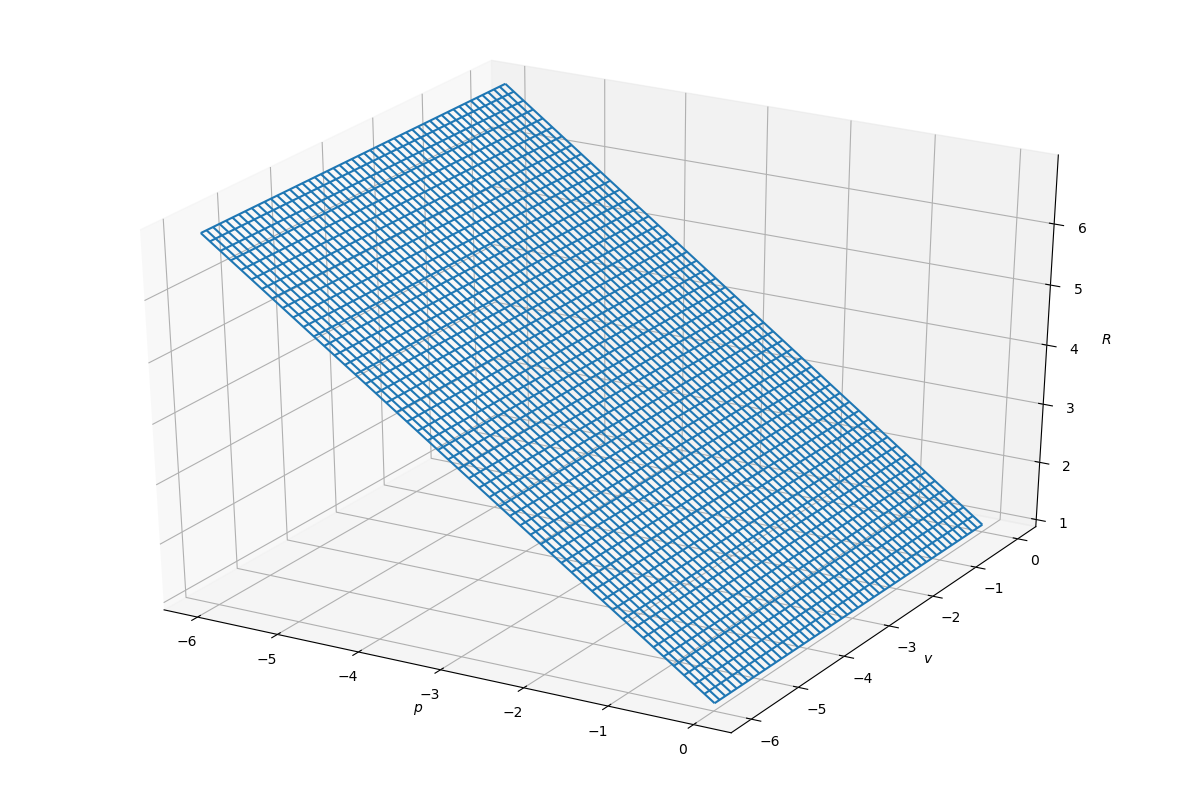

In [8]:
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
P,V = np.meshgrid(p, v)
ax.plot_wireframe(P, V, R)
ax.set_xlabel('$p$')
ax.set_ylabel('$v$')
ax.set_zlabel('$R$')


plt.show()

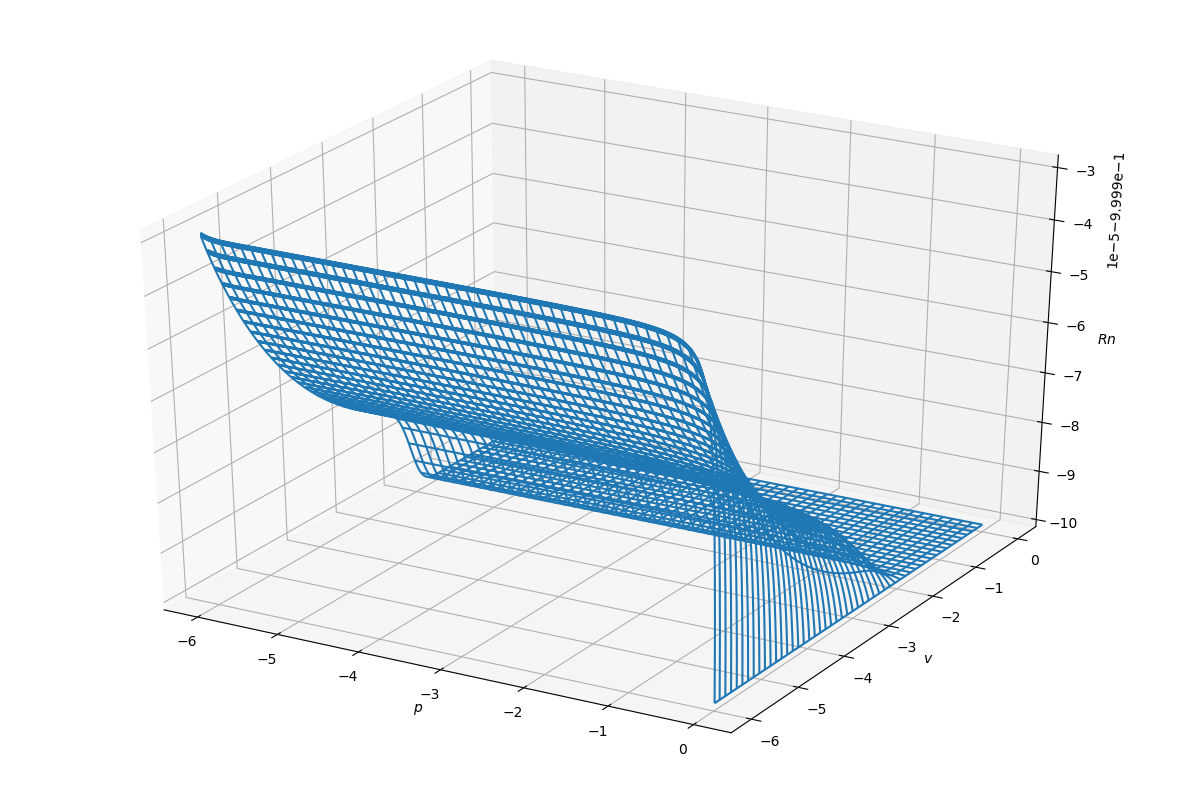

In [9]:
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
#ax.view_init(azim=30)
P,V = np.meshgrid(p, v)
ax.plot_wireframe(P, V, Rn)
ax.set_xlabel('$p$')
ax.set_ylabel('$v$')
ax.set_zlabel('$Rn$')


plt.show()

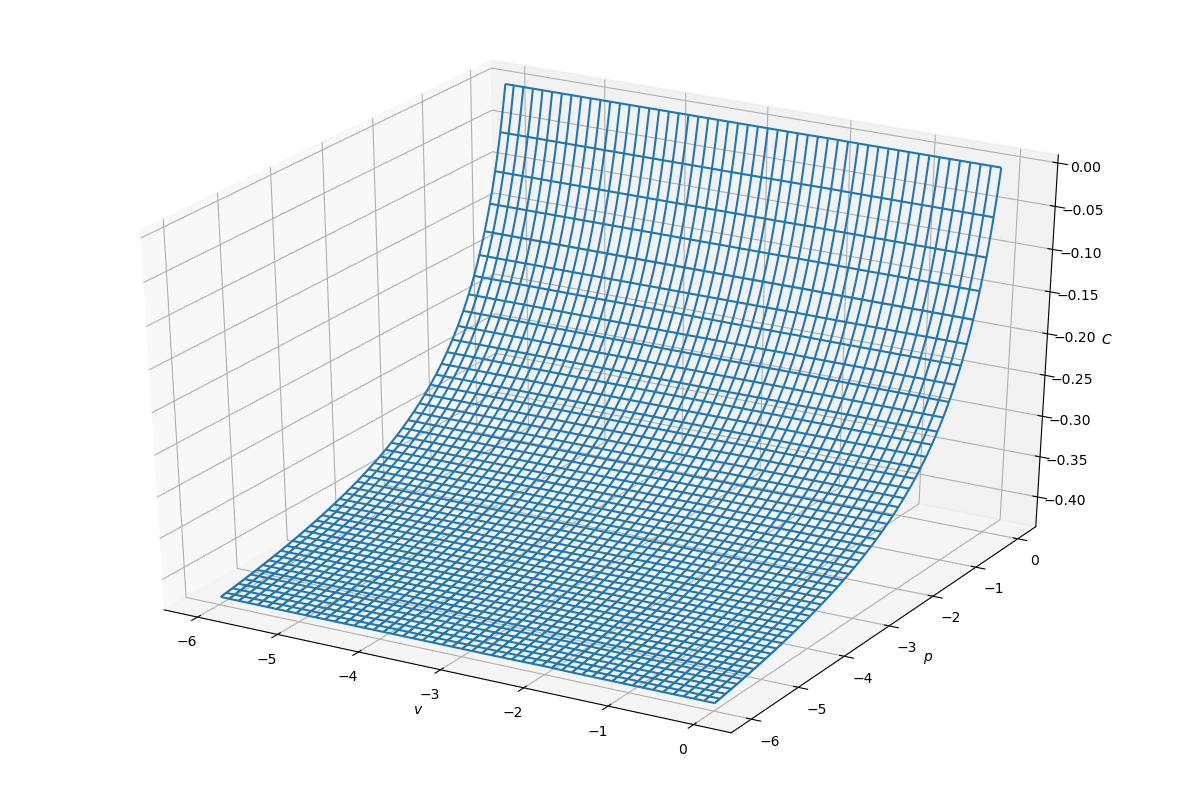

In [10]:
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
P,V = np.meshgrid(p, v)
ax.plot_wireframe(V, P, C)
ax.set_xlabel('$v$')
ax.set_ylabel('$p$')
ax.set_zlabel('$C$')


plt.show()

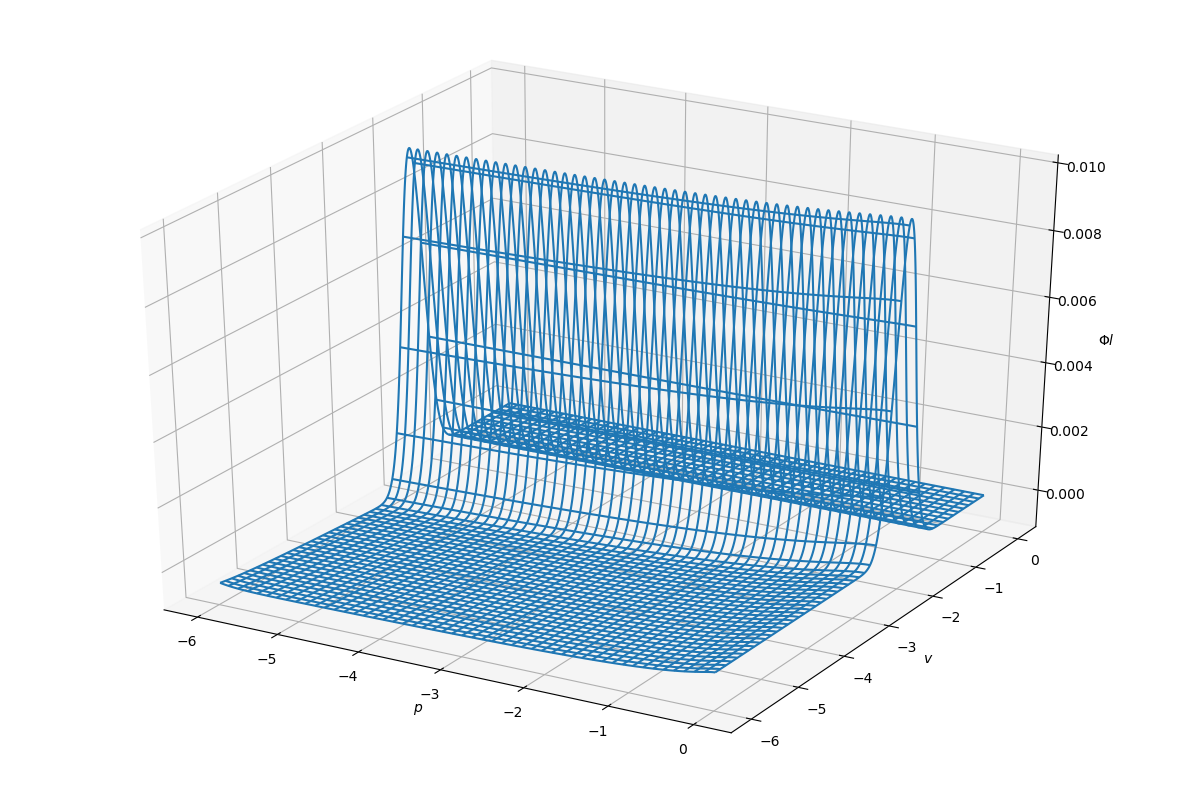

In [11]:
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
P,V = np.meshgrid(p, v)
ax.plot_wireframe(P, V, Φl)
ax.set_xlabel('$p$')
ax.set_ylabel('$v$')
ax.set_zlabel('$Φl$')


plt.show()



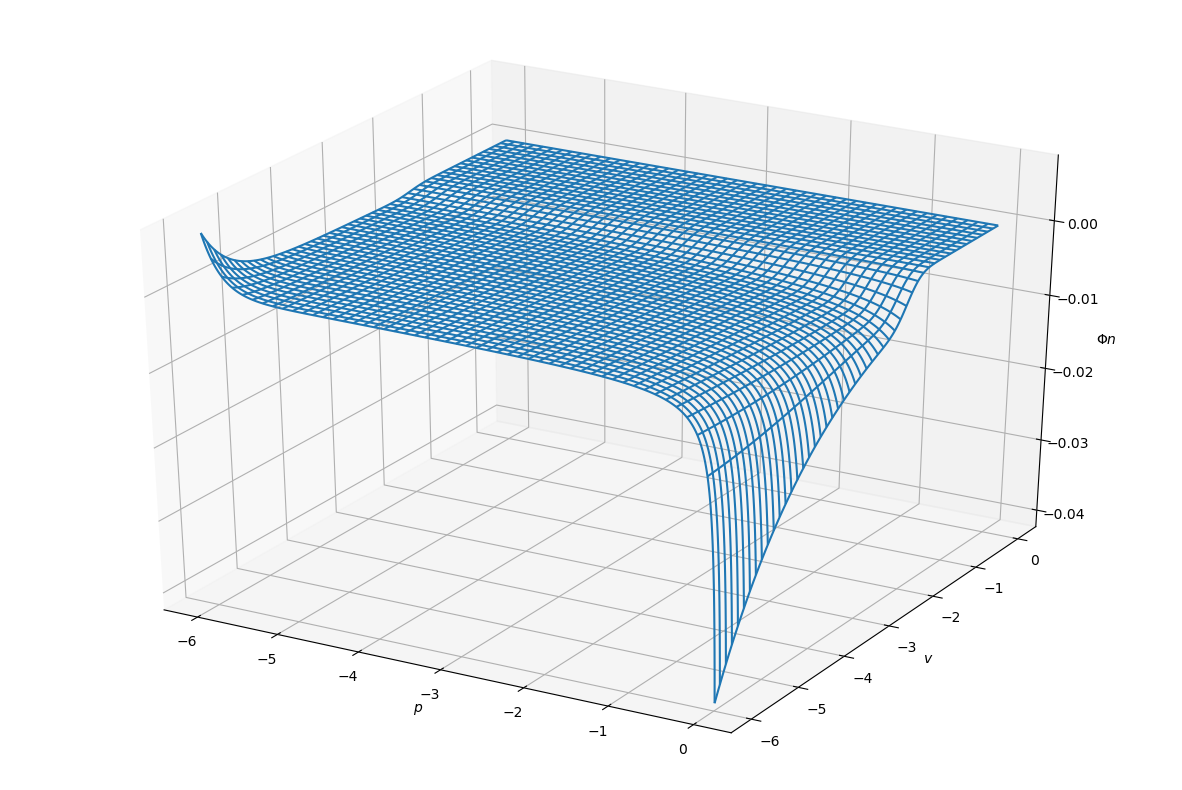

In [12]:
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
P,V = np.meshgrid(p, v)
ax.plot_wireframe(P, V, Φn)
ax.set_xlabel('$p$')
ax.set_ylabel('$v$')
ax.set_zlabel('$Φn$')


plt.show()

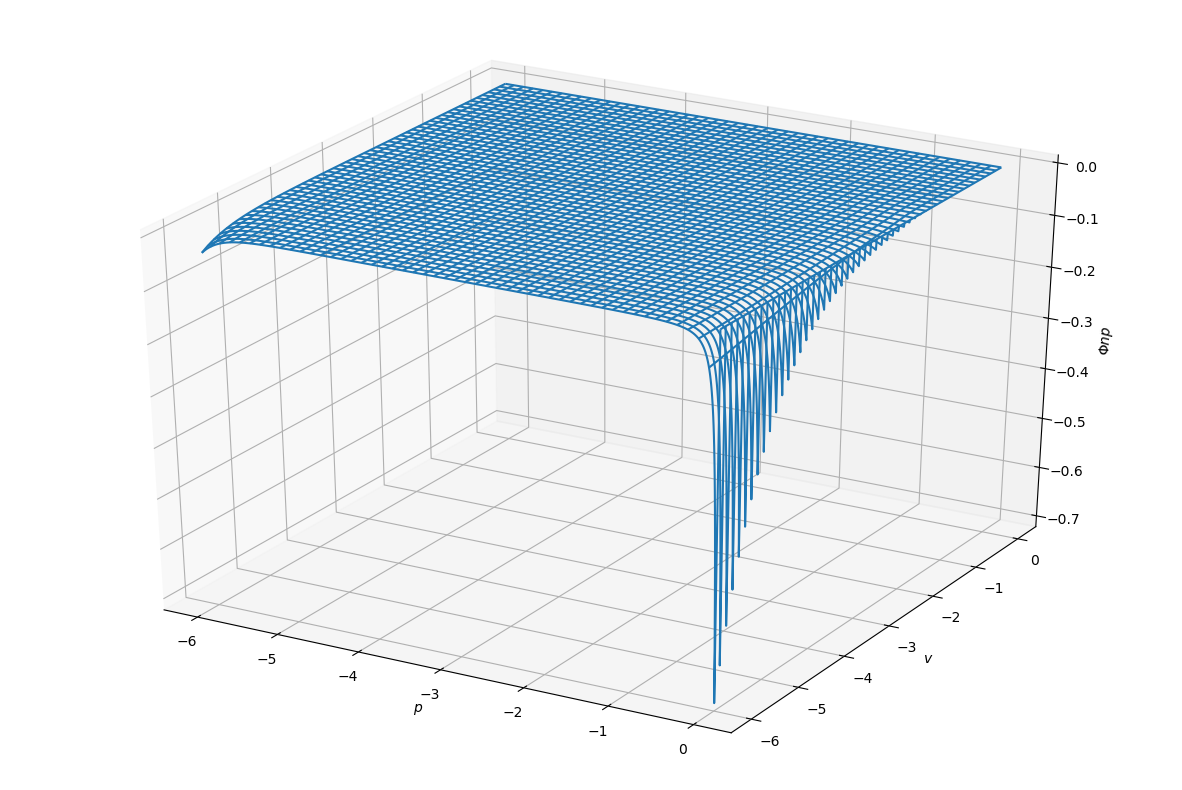

In [13]:
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
P,V = np.meshgrid(p, v)
ax.plot_wireframe(P, V, Φnp)
ax.set_xlabel('$p$')
ax.set_ylabel('$v$')
ax.set_zlabel('$Φnp$')


plt.show()

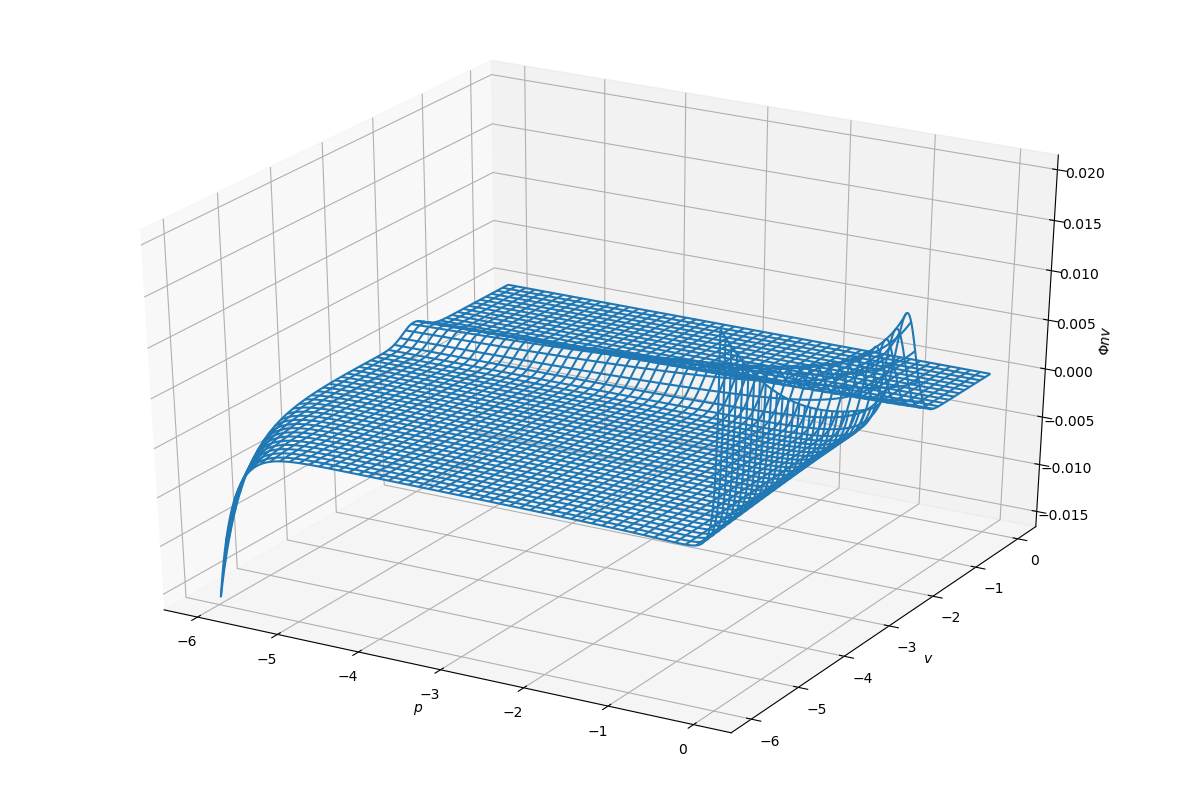

In [14]:
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
P,V = np.meshgrid(p, v)
ax.plot_wireframe(P,V, Φnv)
ax.set_xlabel('$p$')
ax.set_ylabel('$v$')
ax.set_zlabel('$Φnv$')


plt.show()

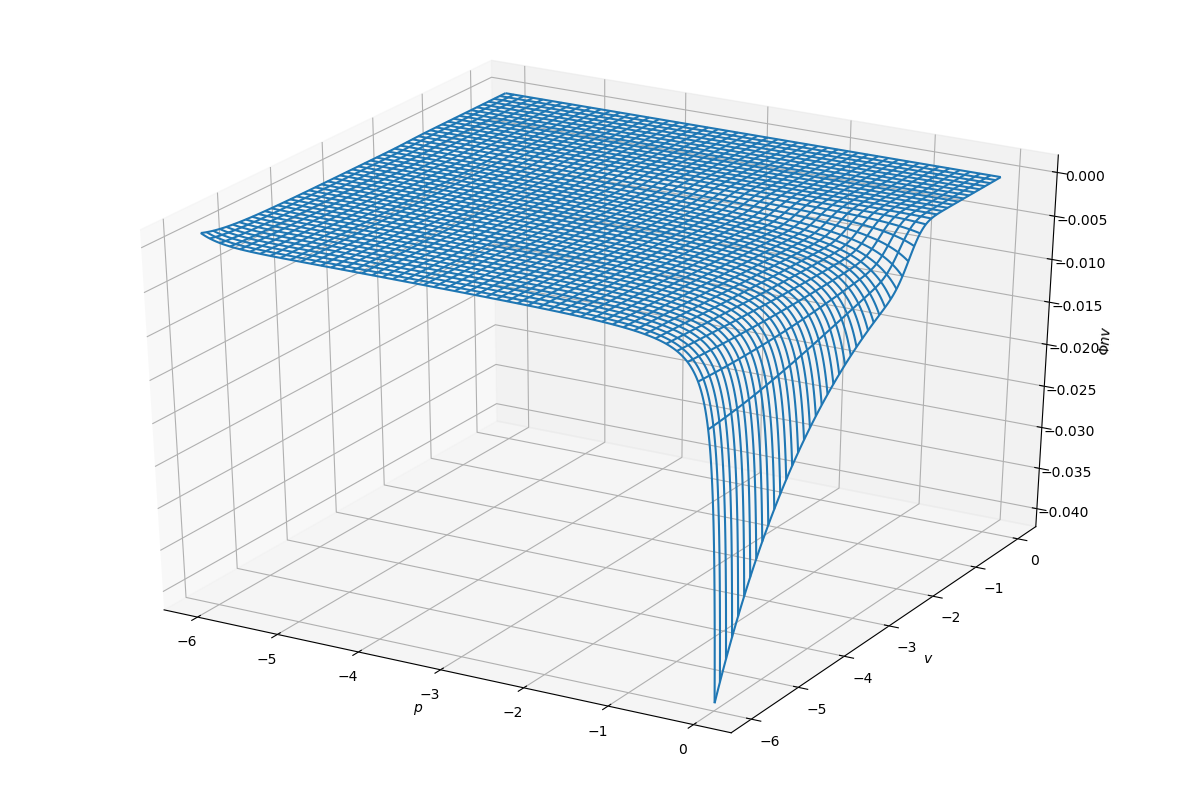

In [15]:
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
P,V = np.meshgrid(p, v)
ax.plot_wireframe(P,V, Φn/R)
ax.set_xlabel('$p$')
ax.set_ylabel('$v$')
ax.set_zlabel('$Φnv$')


plt.show()